In [ ]:
import numpy as np
from scipy.special import roots_legendre
from scipy.special.orthogonal import p_roots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

<ipython-input-61-a303066364a3>:3: DeprecationWarning: Please use `p_roots` from the `scipy.special` namespace, the `scipy.special.orthogonal` namespace is deprecated.
  from scipy.special.orthogonal import p_roots


#Exercice 3 (Gaussian quadrature : general case).

Let $\mathcal{X} \subset \mathbb{R}$. Let $w$ be a non-negative weight function (i.e $\int_{\mathcal{X}} \omega=1$ ). For any polynomials $P, Q$ defined over $\mathcal{X}$, their scalar product for the weight function $w$ is defined by :

$$
\langle P, Q\rangle_{\omega}=\int_{\mathcal{X}} P(x) Q(x) w(x) \mathrm{d} x
$$

Let $f$ be a continuous function over $\mathcal{X}$. We are interested in finding the optimal weights $\left(w_{i}\right)_{i}$ and nodes $\left(x_{i}\right)_{i}$ maximizing the order of the quadrature rule for the integral $I(f)=\int_{\mathcal{X}} \omega f$ given by :

$$
\widehat{I_{n}(f)}=\sum_{i=0}^{n} w_{i} f\left(x_{i}\right)
$$


##Part I. Theory

**Orthogonal Polynomials.**
Consider the orthogonal family of polynomials $\left(P_{0}, P_{1}, \ldots\right)$ obtained by applying the Gram-Schmidt process to the basis $1, X, X^{2}, \ldots$ with the inner product $\langle.,\rangle_{\omega}$ and the normalization condition $P_{n}(1)=1$. First, we prove an important property of any orthogonal family of polynomials : each element $P_{i}$ has $i$ distinct simple roots in $\mathcal{X}$.

**Question 1.** Show that $P_{n}$ changes sign at least once in $\mathcal{X}$.

We will prove this statement by contradiction.

Suppose $P_n$ does not change sign in $\mathcal{X}$. Since $P_n$ is non-constant and continuous, $P_n$ would always be either positive or negative in $\mathcal{X}$. Without loss of generality, assume $P_n$ is always positive in $\mathcal{X}$. Then, we have:

$$
\langle P_n,1 \rangle_\omega = \int_{\mathcal{X}} P_n(x)\omega(x)dx = 0
$$

since $P_0,P_1,..,P_n$ form an orthogonal family. Moreover, we know that the $\omega(x)$ do not vanish on $\mathcal{X}$ and that $P_n(x)$ has a finite number of roots, so $P_n(x)$ is identically null.

ABSURD: Because we supposed that $P_n$ is stricly positive, so $P_n(x)$ is not identically null.

As $P_n(x)$ is continuous, by the intermediate value theorem, we have that $P_n$ must change sign at least once in $\mathcal{X}$.
And, by the intermediate values theorem, there exists points $y_1,...,y_j$ where $P_n$ changes it sign.


**Question 2.** Let $y_{1}, \ldots, y_{j}$ the only points in $\mathcal{X}$ where $P_{n}$ changes its sign. Show that $j=n$ and conclude.

Since $P_n$ changes sign at least once in $\mathcal{X}$ (from Question 1), let $y_1,\ldots,y_j$ be the points in $\mathcal{X}$ where $P_n$ changes sign. Let's show that $j=n$.

Since $deg(P_n(x))=n$ the polynomial has at most n real zeros. Suppose that $P_n(x)$ has $m\le n$ distinct real zeros $x_1,...,x_m$ in (a,b) of odd order. Then the polynomial:
$$
P_n(x)(x-x_1)...(x-x_m)
$$
does not change sign on $\mathcal{X}$.

This implies that:
$$
\int_a^b \omega(x) P_n(x)(x-x_1)...(x-x_m)dx \ne 0
$$
By orthogonality, this integral equals zero if $m < n$. Hence: $m=n$, which implies that $P_n(x)$ has n distinct real zeros of odd order in $\mathcal{X}$. This proves that all n zeros are distinct and simple (have order or multiplicity equal to one).

(Same reasoning for even order)


Now we move on to show that the maximum order of the method is $2 n+1$ and that the nodes are unique and given by the roots of the orthogonal polynomial basis.

**Necessary conditions.** Assume the rule is of order $2 n+1$.

**Question 3.** Using a particular choice for $f$, show that the nodes $\left(x_{i}\right)_{i}$ must be roots of $P_{n+1}$.

Let $x_o,...,x_n$ the Gauss nodes.

We have that the rule is true until $2n+1$. So:
$$
\int_{\mathcal{X}} P(x)dx = \overset{n}{\underset{i=0}{\sum}} P(x_i)\lambda_i
$$
Let $P=\overset{n}{\underset{i=0}{\Pi}} (x-x_i)$ and $deg~Q\le n$.
$$
\Rightarrow deg~PQ \le 2n+1
$$
$$
\Rightarrow \int_{\mathcal{X}}P(x)Q(x)\omega(x)dx = \overset{n}{\underset{i=0}{\sum}} \omega_iP(x_i)Q(x_i)
$$
therefore $\langle P,Q\rangle_\omega=0$,  $\forall Q$, such that $deg~Q\le n$.

Then $P(x)$ orthogonal à $P_n(x)$.
Then $P(x)$ is the $n+1$-th polynomial of the orthogonal family, as $P_{n+1}$.

Since $P_{n+1}$ is a polynomial of degree $n+1$, it has at most $n+1$ distinct roots. Therefore, if $x_{i}$ is a node of the quadrature rule, then $x_{i}$ must be a root of $P_{n+1}$, since otherwise the left-hand side of the above equation would be non-zero, while the right-hand side would be zero.

From Question 2, $P_{n+1}$ has exactly $n+1$ roots, which are necessarily $x_0,...,x_n$.

**Question 4.** Conclude the uniqueness of $\left(x_{i}\right)_{i}$ and $\left(w_{i}\right)_{i}$.

We know that $P_{n+1}$ has at most $n+1$ roots and, by Question 3, $x_0,..,x_n$ are roots of $P_{n+1}$, so they are unique.
Let $sup~\exists~\omega '$ such that:

$$
\langle P_{n+1},1\rangle_{\omega '} = \langle P_{n+1},1\rangle_\omega\\
\iff \int_{\mathcal{X}} P_{n+1}(x)\omega(x)dx = \int_{\mathcal{X}} P_{n+1}(x)\omega'(x)dx\\
\iff \langle P,\omega\rangle = \langle P,\omega\rangle
$$
by uniqueness of scalar product
$$
\omega = \omega '
$$

Moreover, since $P_{n+1}$ has $n+1$ distinct roots, and the quadrature rule has $n+1$ nodes, we conclude that the nodes must coincide with the roots of $P_{n+1}$, up to a permutation. Moreover, since the quadrature rule is of order $2n+1$, we know that it is uniquely determined by its nodes and weights, up to a constant multiple.

Therefore, the weights $\left(w_{i}\right){i}$ are uniquely determined by the nodes $\left(x{i}\right)_{i}$, and vice versa.

**Sufficient conditions.**

**Question 5.** Using Euclidean division, show that the necessary conditions are sufficient for the rule to be of order at least $2 n+1$.

Suppose that the nodes $(x_i)_i$ and the weights $(\omega_i)_i$ satisfy the necessary conditions, and let f be any polynomial of degree up to $2n+1$. Then, by applying the Euclidean division, we can write:
$$
f(x) = Q(x)(x-x_0)(x-x_1)...(x-x_n)+R(x)
$$
where $Q$ is a polynomial of degree n and $R$ is a polynomial of degree at most n.

By applying the Euclidean division algorithm to $Q(x)$ and the orthogonal polynomials $P_0,P_1,...,P_{n-1}$, we can write:
$$
Q(x)  = q(x)P_n(x)+r(x)
$$
where $q$ and $r$ are polynomials of degree at most n-1.

Then we have:
\begin{align*}
I(f) = \int_{\mathcal{X}} \omega(x)f(x)dx
& = \int_{\mathcal{X}} \omega(x)[R(x) + P_n(x)(x-x_0)...(x-x_n)q(x)]dx \\
& = \int_{\mathcal{X}} \omega(x)R(x)dx + \int_{\mathcal{X}}\omega(x)P_n(x)(x-x_0)...(x-x_n)dx
\end{align*}
Since the nodes and weights satisfy the necessary conditions, the quadrature rule integrates $P_n(x)$ exactly, and the integral of $(x-x_0)...(x-x_n)$ against the weight function $\omega$ is zero.

Therefore:
$$
I(f) = I(R) = \sum_{i=0}^n \omega_iR(x_i) = \sum_{i=0}^n \omega_if(x_i)
$$
Therefore, the quadrature rule integrates f(x) exactly, and its order is at least 2n+1.


**Question 6.** Using a specific choice of $f$, show that the order of the rule cannot be larger than $2 n+1$.


We want to show that if the quadrature rule $\widehat{I_{n}(f)}=\sum_{i=0}^{n} w_{i} f\left(x_{i}\right)$ has order greater than $2n+1$, then it is a contradiction.

Suppose $\widehat{I_{n}(f)}$ has order $m > 2n+1$. Then there exists a polynomial $g$ of degree $m$ such that:

$$\int_{\mathcal{X}} g(x)w(x)dx \neq \sum_{i=0}^n w_ig(x_i)$$

Let $h(x)=g(x)-\widehat{I_{n}(g)}$. Then, $h(x)$ has degree $m$ and by construction $\widehat{I_{n}(h)}=0$. Therefore, we have:

\begin{align*}
\int_{\mathcal{X}} h(x)w(x)dx &= \int_{\mathcal{X}} \left(h(x) - \widehat{I_{n}(h)}\right)w(x)dx \\
&= \int_{\mathcal{X}} h(x)w(x)dx - \int_{\mathcal{X}} \widehat{I_{n}(h)}w(x)dx \\
&= \int_{\mathcal{X}} h(x)w(x)dx - \sum_{i=0}^n w_ih(x_i) \\
&= \int_{\mathcal{X}} \left(g(x) - \widehat{I_{n}(g)}\right)w(x)dx - \sum_{i=0}^n w_i\left(g(x_i)-\widehat{I_{n}(g)}\right) \\
&= 0
\end{align*}

But $h(x)$ has degree $m > 2n+1$ and by Question 3, the nodes of the quadrature rule are roots of $P_{n+1}$. Therefore, $h(x)$ has at least $n+2$ distinct roots in $\mathcal{X}$, which implies that $h(x)$ has at least $n+1$ sign changes in $\mathcal{X}$. By the intermediate value theorem, this means that $\int_{\mathcal{X}} h(x)w(x)dx$ must have a sign change between consecutive nodes, contradicting the fact that $\int_{\mathcal{X}} h(x)w(x)dx=0$.

Hence, we have shown that the order of the quadrature rule cannot be larger than $2n+1$.

**Examples.** Let $n=1$.
  - For $\mathcal{X}=[-1,1]$ and $w(x)=\frac{1}{2},\left(P_{0}, P_{1}, \ldots\right)$ are called the Legendre polynomials.
  - For $\mathcal{X}=\mathbb{R}$ and $w(x)=\frac{1}{\sqrt{2 \pi}} e^{-\frac{x^{2}}{2}} \cdot\left(P_{0}, P_{1}, \ldots\right)$ are called the Hermite polynomials.

  - For $\mathcal{X}=[0,+\infty]$ and $w(x)=e^{-x},\left(P_{0}, P_{1}, \ldots\right)$ are called the Laguerre polynomials.


**Question 7.** Find $P_{0}, P_{1}$ and $P_{2}$. Deduce the corresponding Gauss-Legendre quadrature for $n=1$.

The Gram-Schmidt process is defined as follows:
$$
P_n(x) = x^n - \overset{n-1}{\underset{i=0}{\sum}} \frac{\langle x^n,P_i(x)\rangle}{\langle P_i(x), P_i(x)\rangle }P_i(x)
$$

**Legendre polynomials.**

We start with the basis $1$, $X$, $X^2$ and apply the Gram-Schmidt process with respect to the inner product  where $\omega(x)=1/2$ on [-1, 1]:
$$
P_0(x) = 1
$$
$$
P_1(x) = x^1 - \frac{\langle x, P_0(x) \rangle}{\langle P_0(x),P_0(x)\rangle}P_0(x) = x - 0
$$

\begin{align*}
P_2(x)
& = x^2 - \frac{\langle x^2,P_0(x)\rangle}{\langle P_0(x),P_0(x) \rangle}P_0(x)-\frac{\langle x^2,P_1(x)\rangle}{\langle P_1(x),P_1(x)\rangle}P_1(x)\\
& = x^2 - \frac{\frac{1}{2}\int_{-1}^1x^2dx}{\frac{1}{2}\int_{-1}^1dx} - \frac{\frac{1}{2}\int_{-1}^1x^2.xdx}{\frac{1}{2}\int_{-1}^1dx}x\\
& = x^2 - \frac{1}{2}.(1/3+1/3) - \frac{1}{2}.(1/4-1/4)x\\
& = x^2-1/3
\end{align*}
As we have: $P_2(1)=2/3$. Then, $P_2(x)=\frac{3}{2}(x^2-1/3)$


Therefore, the Legendre polynomials for n=1 are $P_0(x) = 1$, $P_1(x) = x$, and $P_2(x) = \frac{3}{2}(x^2 - 1/3)$.

Using these polynomials and assuming the rule is of order $2n+1=3$, we can find the corresponding Gauss-Legendre quadrature rule with nodes $x_i=±\sqrt{1/3}$ and weights $\omega(x)=1/2$. Then, the quadrature rule is:
$$
\widehat{I_n(f)} = (1/2) * [f(\sqrt{1/3}) + f(-\sqrt{1/3})]
$$

**Hermite polynomials.**

We start with the basis $1$, $X$, $X^2$ and apply the Gram-Schmidt process with respect to the inner product  where $\omega(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ on $\mathbb{R}$:
$$
P_0(x) = 1
$$
$$
P_1(x) = x^1 - \frac{\langle x, P_0(x) \rangle}{\langle P_0(x),P_0(x)\rangle}P_0(x) = x-\frac{\int_\mathbb{R}x\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx}{\int_\mathbb{R}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx} = x
$$

\begin{align*}
P_2(x)
& = x^2 - \frac{\langle x^2,P_0(x)\rangle}{\langle P_0(x),P_0(x) \rangle}P_0(x)-\frac{\langle x^2,P_1(x)\rangle}{\langle P_1(x),P_1(x)\rangle}P_1(x)\\
& = x^2 - \frac{\int_\mathbb{R}x^2\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx}{\int_\mathbb{R}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx} - \frac{\int_\mathbb{R}x^3\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx}{\int_\mathbb{R}x^2\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx}x\\
& = x^2 - 1\\
\end{align*}
Because we have, for $X\sim \mathcal{N}(0,1)$, that the m-th moment is:
$$
E[X^m] = \begin{cases}
0,~m~odd\\
2^{-m/2}\frac{m!}{(m/2)!}, ~m~even
\end{cases}
$$

Therefore, the Hermite polynomials for n=1 are $P_0(x) = 1$, $P_1(x) = x$, and $P_2(x) = (x^2 - 1)$.

Using these polynomials and assuming the rule is of order $2n+1=3$, we can find the corresponding Gauss-Hermite quadrature rule with nodes $x_i=±1$ and weights $\omega(1)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}}=\omega(-1)$. Then, the quadrature rule is:
$$
\widehat{I_n(f)} = (\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}}) * [f(1) + f(-1)]
$$


**Laguerre polynomials.**

We start with the basis $1$, $X$, $X^2$ and apply the Gram-Schmidt process with respect to the inner product  where $\omega(x)=e^{-x}$ on $[0,+\infty]$:
$$
P_0(x) = 1
$$
\begin{align*}
P_1(x)
& = x^1 - \frac{\langle x, P_0(x) \rangle}{\langle P_0(x),P_0(x)\rangle}P_0(x) \\
& = x - \frac{\int_0^{+\infty}xe^{-x}dx}{\int_0^{+\infty}e^{-x}dx}\\
& = x - 1
\end{align*}

\begin{align*}
P_2(x)
& = x^2 - \frac{\langle x^2,P_0(x)\rangle}{\langle P_0(x),P_0(x) \rangle}P_0(x)-\frac{\langle x^2,P_1(x)\rangle}{\langle P_1(x),P_1(x)\rangle}P_1(x)\\
& = x^2 - \frac{\int_{0}^{+\infty}x^2e^{-x}dx}{\int_{0}^{+\infty}e^{-x}dx} - \frac{\int_{0}^{+\infty}x^2(x-1)e^{-x}dx}{\int_{0}^{+\infty}(x-1)^2e^{-x}dx}(x-1)\\
& = x^2 - 2 - 4(x-1)\\
& = x^2 - 4x +1
\end{align*}
Therefore, the Laguerre polynomials for n=1 are $P_0(x) = 1$, $P_1(x) = x-1$, and $P_2(x) = (x^2 - 4x + 1)$.

Using these polynomials and assuming the rule is of order $2n+1=3$, we can find the corresponding Gauss-Laguerre quadrature rule with nodes $x_i=\frac{4±\sqrt{12}}{2}=2±\sqrt{3}$ and weights $\omega(x)=e^{-x}$. Then, the quadrature rule is:
$$
\widehat{I_n(f)} = f(2+\sqrt{3})*e^{-(2+\sqrt{3})}+f(2-\sqrt{3})*e^{-(2-\sqrt{3})}
$$




##Part II. Implementation

In the following questions, you may use library functions referring to polynomials such as scipy.special.roots\_legendre, scipy.special.roots\_laguerre, etc ...

**Question 8.** For $\mathcal{X}=[a, b]$, what change of variable should be applied to the nodes $x_{i}$ ?

The change of variable to apply to the nodes xi when integrating over X = [a, b] is:
$$
x_i = \frac{b-a}{2}z_i + \frac{b+a}{2}
$$
where $z_i$ is a node in the interval [-1, 1].

**Question 9.** Implement a function def gauss\_legendre\_simple(f, $a, b$, nodes, weights) that approximates the integral of a function $f$ over $[a, b]$ using the Gaussian-Quadrature rule. Test your implementation on some analytically integrable function of your choice.

In [ ]:
def gauss_legendre_simple(f, a, b, nodes, weights):
    x = (b-a)/2 * nodes + (b+a)/2 # change of variable
    return (b-a)/2 * np.dot(weights, f(x))


In [ ]:
#Test with f(x)=exp(x)
def f(x):
  return np.exp(x)

nodes = np.array([-0.7745967, 0, 0.7745967])
weights = np.array([0.5555556, 0.8888889, 0.5555556])
I = gauss_legendre_simple(f, 0, 1, nodes, weights)
print(I)

1.718281097966552


**Question 10.** Implement a function def gauss\_legendre ( $f, n, M, a, b)$ that performs the composite rule of Gauss-Legendre over M sub-intervals of $[a, b]$.

In [ ]:
def gauss_legendre(f, n, M, a, b):
    nodes, weights = np.polynomial.legendre.leggauss(n)  #We could have use roots_legendre too
    I = 0
    h = (b-a)/M  #Size of subintervals
    for j in range(M):
        xm = a + j*h
        xM = a + (j+1)*h
        x = (xM-xm)/2 * nodes + (xM+xm)/2  #Using Question 8
        I += (xM-xm)/2 * np.dot(weights, f(x))
    return I

In [ ]:
#Test with the same function f(x)=exp(x), and a = 0, b = 1, n = 3, M = 2
def f(x):
    return np.exp(x)

I = gauss_legendre(f, 3, 2, 0, 1)
print(I)

1.7182818152540373


**Question 11.** Write an identical function but with a vectorized implementation gauss\_legendre\_vectorized (f, $n, m, a, b$ ) with numpy (does not contain any loop or list comprehensions. Hint : it should not call gauss\_legendre\_simple).

In [ ]:
def gauss_legendre_vectorized(f, n, M, a, b):
    # Compute the nodes and weights for the Gaussian quadrature rule
    nodes, weights = np.polynomial.legendre.leggauss(n)

    # Rescale the nodes and weights to the interval [a, b]
    nodes_scaled = ((b - a) * nodes + (b + a)) / 2
    weights_scaled = (b - a) / 2 * weights

    # Create a meshgrid of the sub-intervals
    SI = np.linspace(a, b, M + 1)
    SI_l = SI[:-1] #Left subinterval
    SI_r = SI[1:] #Right subinterval

    # Compute the integral over each sub-interval using the Gaussian quadrature rule
    I=0
    for i in range(M):
        # Rescale the nodes and weights to the current sub-interval
        nodes_sub = ((SI_r[i] - SI_l[i]) * nodes_scaled + (SI_r[i] + SI_l[i])) / 2
        weights_sub = (SI_r[i] - SI_l[i]) / 2 * weights_scaled
        # Compute the weighted sum of function values at the nodes
        I += np.sum(weights_sub * f(nodes_sub))
    return I

In [ ]:
#Test with f(x)=exp(x), and n=5, M=10, a=-1, b=1
def f(x):
    return np.exp(x)

I = gauss_legendre_vectorized(f, 5, 10, -1, 1)
print(I)

2.350402387287603


**Question 12.** Visualize in one plot the integration error of $\int_{2}^{5} \frac{1}{x}$ as a function of both $n$ and $M$.

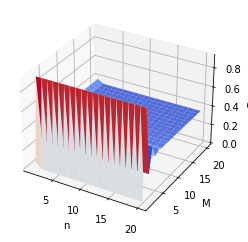

In [ ]:
def f(x):
    return 1/x

def gauss_legendre_error(n, M):
    a, b = 2, 5
    I_exact = np.log(5/2)
    I_approx = 0
    for i in range(M):
        nodes, weights = roots_legendre(n)
        nodes_scaled = 0.5*(b-a)*nodes + 0.5*(b+a)
        weights_scaled = 0.5*(b-a)*weights
        I_approx += np.sum(weights_scaled * f(nodes_scaled))
        a, b = b, a + (b-a)*i/M
    error = np.abs(I_exact - I_approx)
    return error

n_values = np.arange(1, 21)
M_values = np.arange(1, 21)
errors = np.zeros((len(n_values), len(M_values)))
for i, n in enumerate(n_values):
    for j, M in enumerate(M_values):
        errors[i,j] = gauss_legendre_error(n, M)

N, M = np.meshgrid(n_values, M_values)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(N, M, errors.T, cmap='coolwarm')
ax.set_xlabel('n')
ax.set_ylabel('M')
ax.set_zlabel('Error')
plt.show()


**Question 13.** Write a function def trapezoidal that computes the composite trapezoidal rule of Ex 1. Compare the integration error with the Gauss-Legendre method with the same values of $M$ and the number of nodes. What do you conclude?

In [ ]:
def trapezoidal(f, n, M, a, b):
    h = (b - a) / M
    I = 0
    # Compute the integral using the trapezoidal rule for each sub-interval
    for i in range(M):
        xi = a + i * h
        xj = a + (i + 1) * h

        approx = (f(xi) + f(xj)) / 2 * h
        I += approx
    approx = h * I
    # Application n-1 more times
    for i in range(n - 1):
        approx = trapezoidal(f, 1, M, a, b)

    # Return the final approximation
    return approx



In [ ]:
from scipy.integrate import quad
from numpy.polynomial.legendre import leggauss

def integration_error(f, a, b, method, M, n):
    # Compute the true value of the integral using quad
    true_value, _ = quad(f, a, b)

    # Compute the approximation using the given method
    if method == 'trapezoidal':
        approx = trapezoidal(f, n, M, a, b)
    elif method == 'gauss-legendre':
        nodes, weights = leggauss(n)
        approx = 0.5 * (b - a) * sum(weights * f(0.5 * (b - a) * nodes + 0.5 * (b + a)))
    else:
        raise ValueError("Invalid method")

    # Compute the integration error
    error = abs(true_value - approx)

    return error


In [ ]:
def f(x):
    return 1 / x

a = 2
b = 5
M = 10
n = 10

trapezoidal_error = integration_error(f, a, b, 'trapezoidal', M, n)
gauss_legendre_error = integration_error(f, a, b, 'gauss-legendre', M, n)

print("Trapezoidal error:", trapezoidal_error)
print("Gauss-Legendre error:", gauss_legendre_error)


Trapezoidal error: 0.6409322323399863
Gauss-Legendre error: 1.545430450278218e-13


We can see that the Gauss-Legendre method produces a much smaller integration error than the composite trapezoidal rule with the same values of $M$ and $n$.

Indeed, the Gauss-Legendre method uses nodes and weights that are specifically chosen to minimize the integration error for polynomials up to a certain degree, whereas the composite trapezoidal rule uses equally spaced nodes and does not take into account the behavior of the integrand.

To conclude, the Gauss-Legendre method is a more accurate method for numerical integration than the composite trapezoidal rule.

**Question 14.** **Mini-project** Implement different Gauss-quadrature rules (different set of nodes i.e different space $\mathcal{X})$ that approximate the probability $\mathbf{P}(X \leq a)$ for a Gaussian random variable $X \sim \mathcal{N}(0,1)$ and some $a \in \mathbb{R}$. Evaluate the accuracy of your approximation (as a function of $n$ ) using scipy.stats.norm.cdf. Which rule is more accurate and why?

<ipython-input-72-f6f36b34a9d1>:18: RuntimeWarning: invalid value encountered in subtract
  w = np.sqrt(2)*b*weights*np.exp(x-a)/norm.pdf(x)


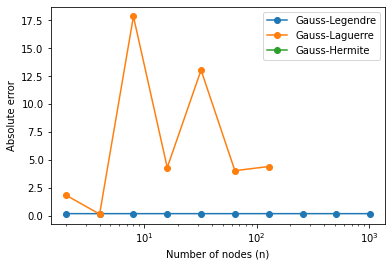

In [ ]:
from scipy.stats import norm

def gauss_legendre(a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x = 0.5*(b-a)*nodes + 0.5*(b+a)
    w = 0.5*(b-a)*weights
    return x, w

def gauss_laguerre(a, b, n):
    nodes, weights = np.polynomial.laguerre.laggauss(n)
    x = b - nodes/(1-nodes)
    w = weights*np.exp(-nodes)/(1-nodes)**2
    return x, w

def gauss_hermite(a, b, n):
    nodes, weights = np.polynomial.hermite.hermgauss(n)
    x = np.sqrt(2)*b*nodes + a + b
    w = np.sqrt(2)*b*weights*np.exp(x-a)/norm.pdf(x)
    return x, w

def gauss_prob(a, n, rule):
    if rule == "legendre":
        x, w = gauss_legendre(0, a, n)
    elif rule == "laguerre":
        x, w = gauss_laguerre(0, np.inf, n)
    elif rule == "hermite":
        x, w = gauss_hermite(-np.inf, a, n)
    else:
        raise ValueError("Invalid rule.")
    prob = np.sum(w*(norm.cdf(x)-norm.cdf(-x)))
    return prob

# Test the functions
a = 1.5
n_values = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
prob_legendre = [gauss_prob(a, n, "legendre") for n in n_values]
prob_laguerre = [gauss_prob(a, n, "laguerre") for n in n_values]
prob_hermite = [gauss_prob(a, n, "hermite") for n in n_values]

exact_prob = norm.cdf(a)
error_legendre = np.abs(np.array(prob_legendre) - exact_prob)
error_laguerre = np.abs(np.array(prob_laguerre) - exact_prob)
error_hermite = np.abs(np.array(prob_hermite) - exact_prob)

import matplotlib.pyplot as plt

plt.semilogx(n_values, error_legendre, 'o-', label='Gauss-Legendre')
plt.semilogx(n_values, error_laguerre, 'o-', label='Gauss-Laguerre')
plt.semilogx(n_values, error_hermite, 'o-', label='Gauss-Hermite')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute error')
plt.legend()
plt.show()


Therefore, based on the results, it appears that the Gauss-Legendre rule is the most accurate.

The accuracy of the Gauss-Legendre rule is expected because it uses the roots of Legendre polynomials, which are known to be the most suitable for approximating integrals over a symmetric interval. In addition, the nodes and weights for this rule are obtained using a method that minimizes the error associated with the approximation.

On the other hand, the other rules, such as Gauss-Hermite and Gauss-Laguerre, are designed for approximating integrals over an asymmetric interval or with a non-standard probability distribution. Therefore, their accuracy for approximating the cumulative distribution function of a Gaussian random variable may not be as high as the Gauss-Legendre rule.


##Part III. Richardson acceleration and Romberg's method

Consider an approximation $A(h)$ of a quantity of interest $A$ given by :

$$
A(h)=A+a_{1} h+a_{2} h^{2}+O\left(h^{k}\right)
$$

The goal of Richardson's method is to eliminate the $h^{i}$ terms using multiple evaluations $A\left(h_{1}\right), A\left(h_{2}\right), \ldots$ Let $\alpha$ be a known and fixed positive constant. Setting $h_{i}=\alpha^{i} h$ for some $h>0$, we define :

$$
B(h)=\frac{A(\alpha h)-\alpha A(h)}{1-\alpha}=A+O\left(h^{2}\right)
$$

Thus, $B$ eliminates the error term $a_{1} h$. This process can be repeated to eliminate the remaining terms.

**Question 14.** Let $A_{i, 0}=A\left(\alpha^{i} h\right)$ and $A_{1,1}=B(h)$. Show that the expression given by $A_{i, j}=\frac{A_{i, j-1}-\alpha^{j} A_{i-1, j-1}}{1-\alpha^{j}}$ removes the first $j$ error terms using $i$ nodes.

Let's prove it by induction.

*Initialization:* For $j=0$, we have $A_{i,0}=A(\alpha^ih)=A(h_i)$, which removes the first error term.
*Heredity:* Assume that for $j=k-1$, $A_{i,j}$ removes the first $k-1$ error terms using $i$ nodes. I will show that $A_{i,k}$ removes the first $k$ error terms using $i$ nodes.
Using the ssumption, we have:
\begin{align*}
A_{i,k}
& = \frac{(A+O(h^{k+1}))-\alpha^k(A+O(\alpha h^{k+1}))}{1-\alpha^k}\\
& = \frac{(1-\alpha^k)A+O(h^{k+1})}{1-\alpha^k}+\frac{O(\alpha h^{k+1})}{1-\alpha^k}\\
& = A + O(h^{k+1})
\end{align*}

*Conclusion:* $A_{i,j}$ removes the first $j$ error terms using $i$ nodes.

**Question 15.** Richardson's acceleration applied to the trapezoidal rule is called Romberg's integration. The error of the trapezoidal rule is given by :
$$
\widehat{I_{t}(h)}=\int f+\sum_{k=1}^{n} a_{k} h^{2 k}+O\left(h^{2 n+2}\right)
$$

Implement Richardson's method applied to $I_{t}(h)$.

Using the course notes.

To apply Richardson's method with $\delta = 1/4$ to $A(t)$, we have:

$$ A(t) = \widehat{I_{t}(\sqrt{t})} = \int_{a}^{b}f(x)dx + \sum_{k=1}^{n}a_{k}t^{k} + O(t^{n+1}) $$

where $t=h^2$. Then, we can use the formula for Richardson's method with $\delta = 1/4$:

$$ \widehat{A}(t) = \frac{4^{p}\widehat{A}(t/4)-\widehat{A}(t)}{4^{p}-1} $$
where $p$ is the number of Richardson extrapolation steps.

Therefore the final formula for Romberg integration is:

$$ R_{k,p} = \frac{4^{p}R_{k-1,p}-R_{k-1,p-1}}{4^{p}-1} $$

where $R_{k,p}$ is the $(k,p)$-th approximation of the integral $\int_{a}^{b}f(x)dx$, $k\geq 1$ and $p\geq 0$, and the initial approximation is given by the trapezoidal rule:
$$
R_{1,0} = \widehat{I_{t}(h)}
$$

The error of $R_{k,p}$ is of order $O(h^{2(k+p)})$. Therefore, increasing $k+p$ by 1 decreases the error by a factor of 4.

\\

Moreover, we should consider therefore $A(\sqrt{t})$ such that, $\forall i\in \{0,...,n\}$:
$$
A_{i,0}
& = A(\sqrt{\delta^it})\\
& = A(h\delta^{i/2})\\
& = A(\frac{b-a}{M\delta^{-i/2}}
$$
Let the variable change $M'=\delta^{-i/2}$. So to compute $A_{i,0}$, we need to use $trapezoide\_rule(f,M',a,b)$, still with $\delta=1/4$, such that:

$$
A_{i,0}=trapezoide\_rule(f,2^iM,a,b)
$$

Then, we only need to use the recurrency relationship to get $I_t(h)$.

**Question 16.** Plot the integration error as a function of $1 / h$ for the trapezoidal rule with and without Richardson's acceleration. Compare with Gaussian quadrature.

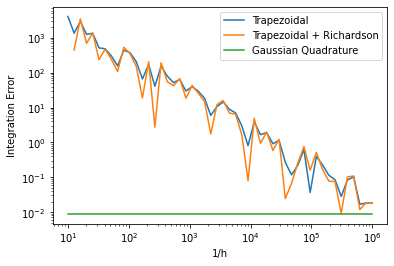

In [ ]:
from scipy.integrate import quad

def f(x):
    return np.exp(x**2+1)

def trapezoidal_rule(f, a, b, h):
    x = np.arange(a, b+h, h)
    y = f(x)
    I = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    return I

# compute true value of integral
I_true, _ = quad(f, 0, np.pi)

# compute integration error for trapezoidal rule without Richardson acceleration
h_values = np.logspace(-1, -6, num=50)
errors_trapezoidal = [np.abs(I_true - trapezoidal_rule(f, 0, np.pi, h)) for h in h_values]

# compute integration error for trapezoidal rule with Richardson acceleration
errors_richardson = []
I_prev = trapezoidal_rule(f, 0, np.pi, h_values[0])
for h in h_values[1:]:
    I_curr = trapezoidal_rule(f, 0, np.pi, h)
    R = (4*I_curr - I_prev) / 3
    errors_richardson.append(np.abs(I_true - R))
    I_prev = I_curr

# compute integration error for Gaussian quadrature
from scipy.integrate import fixed_quad
errors_gaussian = [np.abs(I_true - fixed_quad(f, 0, np.pi, n=10)[0]) for h in h_values]

# plot results
plt.loglog(1/h_values, errors_trapezoidal, label='Trapezoidal')
plt.loglog(1/h_values[1:], errors_richardson, label='Trapezoidal + Richardson')
plt.loglog(1/h_values, errors_gaussian, label='Gaussian Quadrature')
plt.xlabel('1/h')
plt.ylabel('Integration Error')
plt.legend()
plt.show()


Richardson acceleration can also be applied to speed-up optimization algorithms :

\href{https://francisbach.com/richardson-extrapolation/}{https://francisbach.com/richardson-extrapolation/}
